# Implementando makemore - Parte 2

* La idea ahora es hacer lo mismo que hicimos en la parte anterior pero en lugar de contar las ocurrencias de los bigramas, vamos a usar un enfoque de redes neuronales. Nuestro modelo terminará siendo otro modelo de lenguajes probabilistico autoregresivo badado en bigramas, que va a hacer más o menos lo mismo pero de una forma totalmenter diferente.
* La entrada del modelo será un solo carácter (kind of) y la salida será una distribución de probabilidad para el siguiente caracter de la secuencia.
* El conjunto de entremanimento de la red va a ser un conjunto de bigramas, donde el primer caracter del bigrama será nuestro `x` de entrada y el segundo carácter será nuestra `y`
* Además, vamos a poder evaluar los resultados de la red neuronal, por que tenemos una función de perdida (la Negative Log Likelihood loss). Vamos a querer que nuestro modelo asigne una alta probabilidad a `y` (el caracter que le sigue a `x`), es decir que la NLL es baja.
* Vamos a usar desenso por gradientes para optimizar los pesos de la red neuronal y hacer que el modelo prediga el siguiente caracter correctamente.
* Esto nos va a dejar en un punto muy parecido a donde terminamos la parte anterior, pero vamos a ver que este enfoque es mucho más flexible y nos va a permitir evolucionar los modelos con mayor facilidad.

Vamos a empezar a hacer uso intensivo de PyTorch así que pongansé las pilas y codeen conmigo.

## Modificando el dataset para alimentar la red neuronal
Las redes neuronales procesan números, no podemos mandarles caracteres. Entonces?

## Primer intento - Una "red neuronal" de una neurona. 

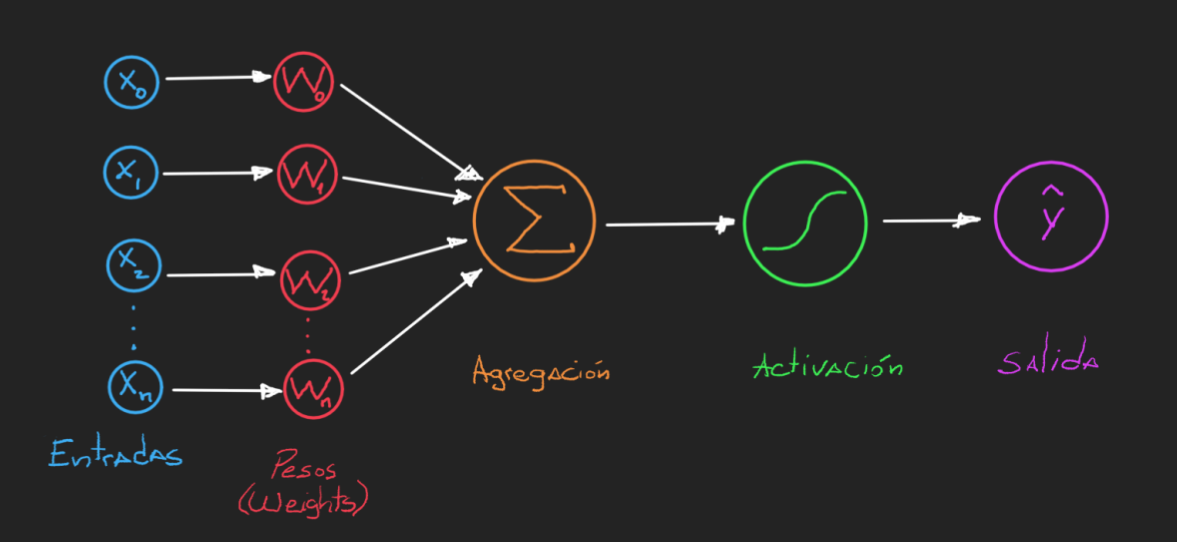Nuestro primer modelo será una única neurona lineal (sin función de activación) ni bias, con 40 entradas y una salida. 

Nuestra entrada va a ser un vector $X = x_i \mid i \in{0,1,...,39}$, es decir un vector en formato `one hot` de 40 dimensiones (39 ceros y 1 uno) cuyo unico valor en 1 será el del índice que corresponde a la letra de entrada.

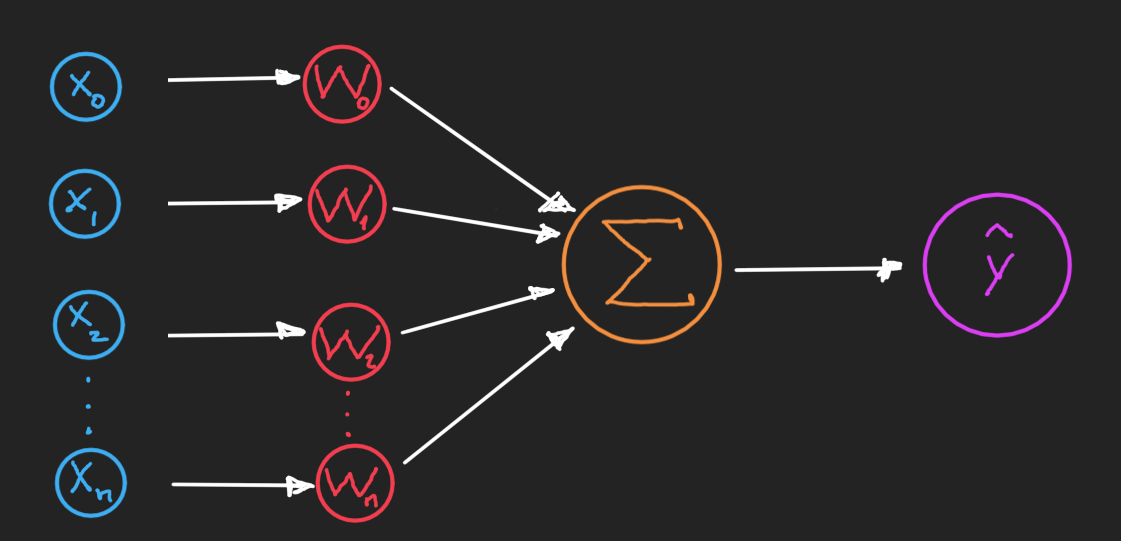

## Segundo intento - Una red con una capa de 40 neuronas
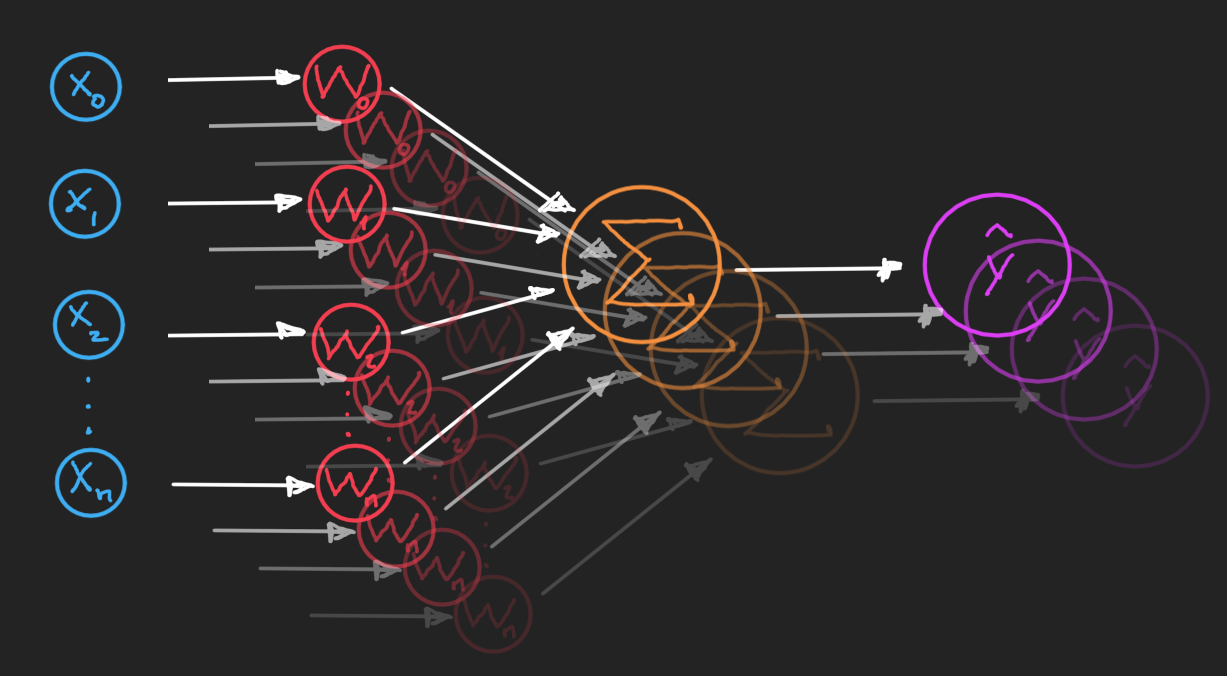

## Como interpretamos la salida de la red?

La pregunta es que es esto 👆 Cómo interpretamos el output de la red neuronal?
* No son probabilidades porque exceden el rango [0, 1]
* No son counts por que son flotantes y hay negativos

Vamos a interpretar esta salida como log(counts) o logits. Para obtener counts podemos exponenciar. Luego, si normalizamos podemos interpretar la salida como probabilidades.

In [ ]:
#plt.plot(np.arange(0.001, 5, 0.01),np.log(np.arange(0.001, 5,0.01)));plt.grid()

In [ ]:
#plt.plot(np.arange(-4, 2, 0.01),np.exp(np.arange(-4, 2,0.01)));plt.grid()

In [ ]:
g = torch.Generator().manual_seed(42)
W = torch.randn((nclasses, nclasses), generator=g)

logits = xenc @ W  
counts = logits.exp()
probs = counts/counts.sum(axis=1, keepdims=True)
probs.sum(axis=1,keepdims=True)

nlls = torch.zeros(len(ys))
for i in range(len(ys)):
    x = xs[i].item()  # indice de la entrada
    y = ys[i].item()  # indice de la etiqueta
    print('-----------')
    print(f'Bigrama {i}: ({itoc[x]}, {itoc[y]}) idx:({x},{y})')
    print(f'Entrada: {x}')
    print(f'Salida: {probs[i]}')
    p = probs[i, y]
    print(f'Probabilidad asignada a la etiqueta {y}: {p}')
    logp = torch.log(p)
    print(f'Log Likelihood: {logp.item()}')
    nll = -logp
    print(f'Negative Log Likelihood: {nll}')
    nlls[i] = nll
print('============')
print(f'NLL promedio (loss): {nlls.mean().item()}')

## Pasando en limpio
## La función de perdida vectorizada (vectorized loss)

In [ ]:
xs, ys = [], []

for d in dataset:
    example = ['*'] + list(d) + ['*']
    for c1, c2 in zip(example, example[1:]):
        xs.append(ctoi[c1])
        ys.append(ctoi[c2])
       # print(c1, c2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
# forward pass
xenc = F.one_hot(xs,num_classes=nclasses).float()  # la entrada a la NN en encodeada en one_hot
logits = xenc @ W  # hacemos una predicción de los log(counts)
counts = logits.exp()                               # obtenemos la matriz de cuentas        `|__
probs = counts / counts.sum(axis=1, keepdims=True)  # obtenemos la matriz de probabilidades ,|   Esto es lo que se conoce como softmax


loss = -probs[range(len(ys)), ys].log().mean()
loss

## La función Softmax
La función softmax toma un vector de logits $Z$ y aplica la siguiente función a cada uno de sus valores $z_i$:

$$softmax(Z) = \frac{e^{z_i}}{\sum_j^k e^{z_j}}$$

La función softmax (en forma de capas de torch) es muy utilizada. Básicamente convierte la salida de una red neuronal en una distribución de probabilidad (ojo, que estoy abusando del lenguaje). Para ser estrictos, softmax toma el vector de salidas de la red neuronal y retorna un vector de igual dimensión, normalizado al rango `[0, 1]`.

## Entrenando la red neuronal - Wiiiiiiii

## Regularization loss como análogo del model smoothing

## Multiplicación de matrices como análogo a la indexación de nuestra matriz de probabilidades

## Conclusiones
* Esta segunda versión de `makemore` genera más o menos lo mismo pero usando un enfoque de redes neuronales.
* El enfoque es mucho más flexible.
* Vimos como codificar la entrada para una red neuronal y como es posible calcular la salida de la red para múltiples entradas haciendo uso de las funciones vectorizadas de PyTorch.
* Vimos que no alcanza usar una sola neurona y que es necesario modelar de manera diferente el problema
* Aprendimos como interpretar la salida de una capa de neuronas como el logaritmo de las ocurrencias
* Aprendimos a transformar logits en distribuciones de probabilidad usando softmax
* Entrenamos el modelo y vimos que el resultado es muy similar al modelo anterior
* Vimos que hay similitudes entre la matriz W que aprende el modelo y la matriz de probabilidades
* Vimos qué es la regularization loss y su relación con model smoothing.

## Ejercicios
* Generar un modelo de trigramas usando el enfoque de redes neuronales (intermedio)
  * Pista: Usar one hot para encodear las dos entradas en un solo vector de 80 dimensiones, y usar un modelo de 40 neuronas (40 salidas), con 80 entradas cada una.